# 1. Overview

https://www.kaggle.com/c/home-credit-default-risk

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Read the Data

In [8]:
path = os.getcwd()
path = os.path.join(path, 'data')
os.listdir(path)

['.DS_Store',
 'application_test.csv',
 'application_train.csv',
 'bureau.csv',
 'bureau_balance.csv',
 'credit_card_balance.csv',
 'HomeCredit_columns_description.csv',
 'installments_payments.csv',
 'POS_CASH_balance.csv',
 'previous_application.csv',
 'sample_submission.csv',
 'zip']

In [70]:
train_raw = pd.read_csv(path + '/application_train.csv')
test_raw = pd.read_csv(path + '/application_test.csv')
train_raw.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
print("train.shape = {}, test.shape = {}".format(train_raw.shape,test_raw.shape))

train.shape = (307511, 122), test.shape = (48744, 121)


# 3. Explore and Prepare the Data

In [74]:
train = train_raw.copy(deep=True)
test = test_raw.copy(deep=True)

In [12]:
train.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_

In [13]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [14]:
train["TARGET"].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

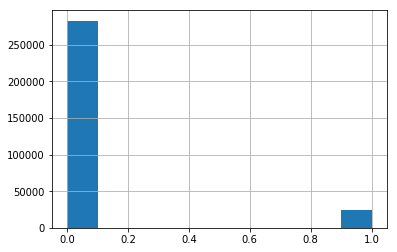

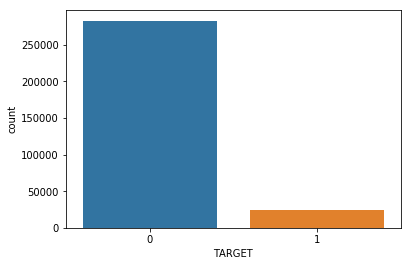

In [15]:
#train["TARGET"].plot.hist();
train["TARGET"].hist();
plt.show()

sns.countplot(train['TARGET'])
plt.show()

In [22]:
train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [28]:
train.select_dtypes(include=['object']).apply(pd.Series.nunique,axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [41]:
train.columns[5:30]

Index(['FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [115]:
train[train.columns[10]].unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [57]:
train1["CODE_GENDER"].describe()

count     307511
unique         3
top            F
freq      202448
Name: CODE_GENDER, dtype: object

## 3.2 Missing Value

In [16]:
# examine fraction of missing value in each attribute
def missing_df(df):
        """
        return a data frame containing the statistics of missing value
        """
        
        total = df.isnull().sum().sort_values(ascending=False)
        fraction = 100 * total / df.shape[0]
        
        # keep to two decimal places
        fraction = fraction.apply(lambda x: round(x,2))
        
        df_missing = pd.concat([total,fraction], axis=1, keys=['Total','Fraction'])
        df_missing.index.name = 'Attributes'
        
        return df_missing


In [75]:
train_missing = missing_df(train)
train_missing.head(20)

,Total,Fraction
Attributes,,
COMMONAREA_MEDI,214865,69.87
COMMONAREA_AVG,214865,69.87
COMMONAREA_MODE,214865,69.87
NONLIVINGAPARTMENTS_MODE,213514,69.43
NONLIVINGAPARTMENTS_MEDI,213514,69.43
NONLIVINGAPARTMENTS_AVG,213514,69.43
FONDKAPREMONT_MODE,210295,68.39
LIVINGAPARTMENTS_MEDI,210199,68.35
LIVINGAPARTMENTS_MODE,210199,68.35


We can check the percentage of missing value. If it's very big, perhaps it is not useful. So we can simply delete the attributes. We can define a threshold value for this purpose. Theoretically, **25 to 30%** is the maximum missing values that are allowed [see here](https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456). $x^2+y^2$

In [231]:
trainY = train['TARGET']

# keep only attributes with missing value fraction < 0.3
keep_attributes = train_missing[train_missing['Fraction'] < 30].drop('TARGET',axis=0).index

In [232]:
trainY.shape

(307511,)

In [86]:
trainX = train[keep_attributes]
test = test[keep_attributes]
print("trainX.shape = {}, test.shape = {}".format(trainX.shape,test.shape))

trainX.shape = (307511, 71), test.shape = (48744, 71)


In [93]:
missing_df(test.select_dtypes(include='object'))

,Total,Fraction
Attributes,,
NAME_TYPE_SUITE,911,1.87
ORGANIZATION_TYPE,0,0.00
WEEKDAY_APPR_PROCESS_START,0,0.00
NAME_HOUSING_TYPE,0,0.00
NAME_INCOME_TYPE,0,0.00
NAME_EDUCATION_TYPE,0,0.00
NAME_FAMILY_STATUS,0,0.00
FLAG_OWN_REALTY,0,0.00
CODE_GENDER,0,0.00


In [89]:
missing_df(trainX.select_dtypes(include='object'))

,Total,Fraction
Attributes,,
NAME_TYPE_SUITE,1292,0.42
ORGANIZATION_TYPE,0,0.00
WEEKDAY_APPR_PROCESS_START,0,0.00
NAME_HOUSING_TYPE,0,0.00
NAME_INCOME_TYPE,0,0.00
NAME_EDUCATION_TYPE,0,0.00
NAME_FAMILY_STATUS,0,0.00
FLAG_OWN_REALTY,0,0.00
CODE_GENDER,0,0.00


In [90]:
trainX['NAME_TYPE_SUITE'].value_counts(normalize=True)

Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64

There is no missing value in any of the categorical attributes except `NAME_TYPE_SUITE`, _who accompanied client when applying for the previous application_. I will fill the missing values with the majority value `Unacompanied`.

In [94]:
trainX['NAME_TYPE_SUITE'].fillna('Unaccompanied',inplace=True)
test['NAME_TYPE_SUITE'].fillna('Unaccompanied',inplace=True)
missing_df(trainX.select_dtypes(include='object'))

/Users/ruizheng/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Total,Fraction
Attributes,,
ORGANIZATION_TYPE,0,0.0
WEEKDAY_APPR_PROCESS_START,0,0.0
NAME_HOUSING_TYPE,0,0.0
NAME_INCOME_TYPE,0,0.0
NAME_EDUCATION_TYPE,0,0.0
NAME_FAMILY_STATUS,0,0.0
FLAG_OWN_REALTY,0,0.0
CODE_GENDER,0,0.0
NAME_CONTRACT_TYPE,0,0.0


In [95]:
missing_df(test.select_dtypes(include='object'))

,Total,Fraction
Attributes,,
ORGANIZATION_TYPE,0,0.0
WEEKDAY_APPR_PROCESS_START,0,0.0
NAME_HOUSING_TYPE,0,0.0
NAME_INCOME_TYPE,0,0.0
NAME_EDUCATION_TYPE,0,0.0
NAME_FAMILY_STATUS,0,0.0
FLAG_OWN_REALTY,0,0.0
CODE_GENDER,0,0.0
NAME_CONTRACT_TYPE,0,0.0


In [102]:
trainX.dtypes.value_counts()

int64      40
float64    20
object     11
dtype: int64

In [133]:
test.dtypes.value_counts()

int64      40
float64    20
object     11
dtype: int64

In [186]:
from sklearn.preprocessing import Imputer

train_numerical = trainX.select_dtypes(exclude='object')
train_categorical = trainX.select_dtypes(include='object')
test_numerical = test.select_dtypes(exclude='object')
test_categorical = test.select_dtypes(include='object')

imputer = Imputer(strategy="median")
imputer.fit(train_numerical)
X = imputer.transform(train_numerical)
train_numerical = pd.DataFrame(X,columns=train_numerical.columns)
X = imputer.transform(test_numerical)
test_numerical = pd.DataFrame(X,columns=test_numerical.columns)


In [187]:
# check the result

# shape
assert train_numerical.shape == (train_raw.shape[0], 60)
assert test_numerical.shape == (test_raw.shape[0], 60)
# missing vlaue
assert train_numerical.notnull().all().all()
assert test_numerical.notnull().all().all()

## 3.3 Anomalies, Outliers

An [outlier](https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm) is an observation that lies an abnormal distance from other values in a random sample from a population. 

## 3.4 Categorical Data

In [188]:
train_categorical.nunique()

NAME_TYPE_SUITE                7
FLAG_OWN_CAR                   2
NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_REALTY                2
NAME_FAMILY_STATUS             6
NAME_EDUCATION_TYPE            5
NAME_INCOME_TYPE               8
NAME_HOUSING_TYPE              6
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64

In [189]:
test_categorical.nunique()

NAME_TYPE_SUITE                7
FLAG_OWN_CAR                   2
NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_REALTY                2
NAME_FAMILY_STATUS             5
NAME_EDUCATION_TYPE            5
NAME_INCOME_TYPE               7
NAME_HOUSING_TYPE              6
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64

Following Will KoehrsenStart's [idea](https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction), I will do label encoding for attributes with only two categories and one-hot encoding for attributes with more than two categories. 

In [193]:
def label_encoding(train, test):
    """
    label encoding for categorical attributes with no more than two categories. 
    """
    assert train.shape[1] == test.shape[1]
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    for col in train:
        if train[col].dtype == 'object' and len(list(train[col].unique())) <= 2 and len(list(test[col].unique())) <= 2:
            le.fit(train[col])
            train.loc[:,col] = le.transform(train[col])
            test.loc[:,col] = le.transform(test[col])
            
    assert train.shape[1] == test.shape[1]
    return train, test


def one_hot_encoding(train, test):
    """
    If we use pd.get_dummies() for train and test data separately, it is possible they end up with different 
    number of columns. So I will first concatenate and then split them.
    """
    row_train, row_test = train.shape[0], test.shape[0]
    data = pd.get_dummies(pd.concat([train,test],axis=0))
    train, test = data.iloc[:row_train,:], data.iloc[row_train:,:]   

    assert train.shape[1] == test.shape[1]
    assert train.shape[0] == row_train, test.shape[0] == row_test
    return train, test


def categorical_encoding(train, test):
    """
    combine label encoding and one hot encoding
    """
    return one_hot_encoding(*label_encoding(train, test))
    

In [225]:
train_categorical, test_categorical = categorical_encoding(train_categorical, test_categorical)
trainX, test = pd.concat([train_numerical,train_categorical],axis=1), pd.concat([test_numerical,test_categorical],axis=1)
print(trainX.shape,test.shape)

(307511, 163) (48744, 163)


## 3.5 Correlation

In [202]:
# pairwise pearson correlation 
train = pd.concat([trainX,trainY],axis=1)
corr = train.corr(method='pearson')

In [203]:
corr_Y = corr["TARGET"].sort_values()
print(corr_Y.head(10),corr_Y.tail(10),sep='\n\n')

EXT_SOURCE_2                           -0.160295
EXT_SOURCE_3                           -0.155892
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
NAME_INCOME_TYPE_Pensioner             -0.046209
ORGANIZATION_TYPE_XNA                  -0.045987
DAYS_EMPLOYED                          -0.044932
AMT_GOODS_PRICE                        -0.039623
REGION_POPULATION_RELATIVE             -0.037227
NAME_CONTRACT_TYPE                     -0.030896
Name: TARGET, dtype: float64

NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                   

`DAYS_BIRTH` is Client's age in days at the time of application. Its values are negative. It means older people are more likely to repay the loan.  

In [204]:
train['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [205]:
train['DAYS_BIRTH'] = train['DAYS_BIRTH'].apply(lambda x:abs(x)/365)

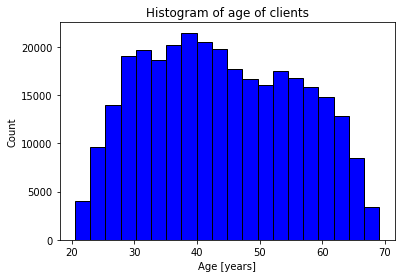

In [206]:
# train['DAYS_BIRTH'].plot.hist(bins=25)
plt.hist(train['DAYS_BIRTH'],bins=20,color='blue',edgecolor='black', linewidth=1);
plt.title('Histogram of age of clients')
plt.xlabel('Age [years]')
plt.ylabel('Count')
plt.show()

In [207]:
train.head()

,TARGET,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,1,0.139376,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.535276,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


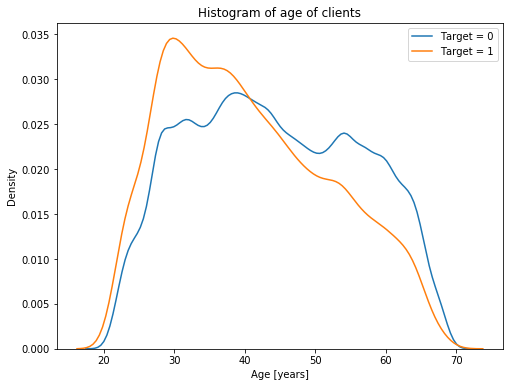

In [208]:
import seaborn as sns

plt.figure(figsize = (8,6))
# sns.kdeplot(train.loc[train['TARGET']==0,'DAYS_BIRTH'], label = 'Target = 0')
# sns.kdeplot(train.loc[train['TARGET']==1,'DAYS_BIRTH'], label = 'Target = 1')
sns.kdeplot(train[train['TARGET']==0]['DAYS_BIRTH'], label = 'Target = 0')
sns.kdeplot(train[train['TARGET']==1]['DAYS_BIRTH'], label = 'Target = 1')
plt.title('Histogram of age of clients')
plt.xlabel('Age [years]')
plt.ylabel('Density')
plt.show()

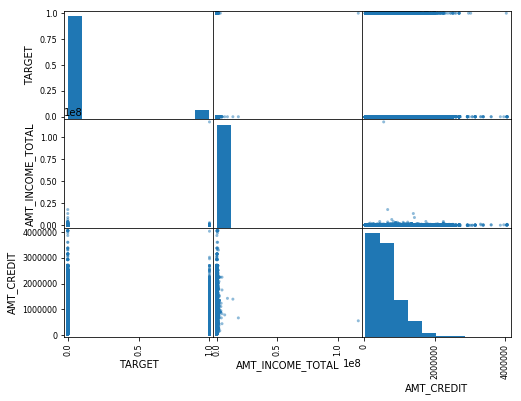

In [87]:
from pandas.plotting import scatter_matrix
attributes = ['TARGET','AMT_INCOME_TOTAL',
       'AMT_CREDIT']
scatter_matrix(train[attributes],figsize=(8,6))
plt.show()

In [216]:
# select only attributes with |corr| > 0.05
indices = corr_Y[abs(corr_Y) > 0.05].index
fea_corr = train[indices].corr()
print(fea_corr.shape)
fea_corr

(13, 13)


,EXT_SOURCE_2,EXT_SOURCE_3,NAME_EDUCATION_TYPE_Higher education,CODE_GENDER_F,REG_CITY_NOT_WORK_CITY,DAYS_ID_PUBLISH,CODE_GENDER_M,DAYS_LAST_PHONE_CHANGE,NAME_INCOME_TYPE_Working,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,DAYS_BIRTH,TARGET
EXT_SOURCE_2,1.000000,0.094147,0.124409,0.014721,-0.075868,-0.050881,-0.014731,-0.195460,-0.067749,-0.292621,-0.288013,0.091947,-0.160295
EXT_SOURCE_3,0.094147,1.000000,-0.022604,0.019071,-0.069288,-0.111864,-0.019037,-0.063544,-0.058393,-0.011724,-0.011342,0.178527,-0.155892
NAME_EDUCATION_TYPE_Higher education,0.124409,-0.022604,1.000000,0.016031,-0.023813,0.025781,-0.016032,-0.006281,-0.074165,-0.065014,-0.067580,-0.115808,-0.056593
CODE_GENDER_F,0.014721,0.019071,0.016031,1.000000,-0.137565,-0.000131,-0.999971,-0.025287,-0.106294,0.017874,0.017276,0.148074,-0.054704
REG_CITY_NOT_WORK_CITY,-0.075868,-0.069288,-0.023813,-0.137565,1.000000,0.099354,0.137581,0.046787,0.149716,0.008360,0.028081,-0.242401,0.050994
DAYS_ID_PUBLISH,-0.050881,-0.111864,0.025781,-0.000131,0.099354,1.000000,0.000132,0.088577,0.128708,-0.005103,-0.007737,-0.272691,0.051457
CODE_GENDER_M,-0.014731,-0.019037,-0.016032,-0.999971,0.137581,0.000132,1.000000,0.025283,0.106282,-0.017885,-0.017288,-0.148060,0.054713
DAYS_LAST_PHONE_CHANGE,-0.195460,-0.063544,-0.006281,-0.025287,0.046787,0.088577,0.025283,1.000000,0.007111,0.026022,0.025717,-0.082940,0.055218
NAME_INCOME_TYPE_Working,-0.067749,-0.058393,-0.074165,-0.106294,0.149716,0.128708,0.106282,0.007111,1.000000,0.102809,0.093937,-0.304568,0.057481
REGION_RATING_CLIENT,-0.292621,-0.011724,-0.065014,0.017874,0.008360,-0.005103,-0.017885,0.026022,0.102809,1.000000,0.950842,-0.009361,0.058899


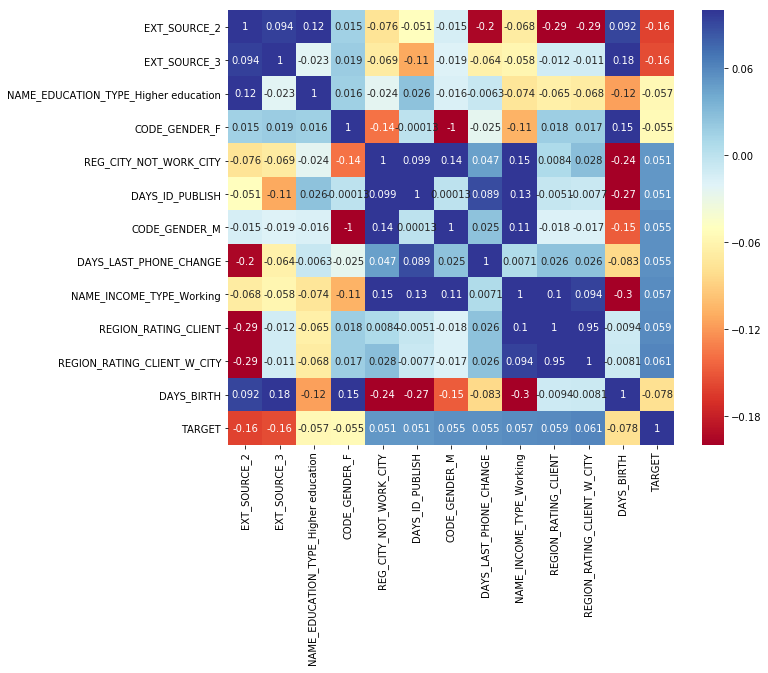

In [218]:
plt.figure(figsize=(10,8))
sns.heatmap(fea_corr, cmap="RdYlBu", annot=True, vmin=-0.2, vmax=0.1)
plt.show()

## Feature Engineering

## Feature Scaling

In [222]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(trainX)
trainX, test = scaler.transform(trainX), scaler.transform(test)


# Training

In [237]:
from sklearn.model_selection import train_test_split, cross_val_score
trainX1, testX1, trainY1, testY1 = train_test_split(trainX, trainY, test_size=0.2, shuffle=True, random_state=42)

## 5.1 Decision Tree

In [257]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10)
dt.fit(trainX1, trainY1)
# cross_val_score(dt,trainX,trainY,cv=10)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [258]:
from sklearn.metrics import roc_auc_score
Y_score = dt.predict_proba(testX1)
roc_auc_score(testY1,Y_score[:,1])

0.695567938997508

## 5.2 Logistic Regression

In [259]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(trainX1, trainY1)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [261]:
from sklearn.metrics import roc_auc_score
Y_score = log_reg.predict_proba(testX1)
roc_auc_score(testY1,Y_score[:,1])

0.6247251047932966

## 5.3 Random Forest

In [263]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)
# Train on the training data
random_forest.fit(trainX1,trainY1)


# Make predictions on the test data
Y_score = random_forest.predict_proba(testX1)
roc_auc_score(testY1,Y_score[:,1])

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   18.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.5s finished


0.7142523613903511

# 6 Submission

In [279]:
test_Y_score = random_forest.predict_proba(test)[:,1]

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished


In [294]:
# Make a submission dataframe
submit = test[['SK_ID_CURR']]
submit['TARGET'] = test_Y_score

/Users/ruizheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [295]:
submit['SK_ID_CURR'] = submit['SK_ID_CURR'].apply(lambda x:int(x))
submit.head()

/Users/ruizheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,SK_ID_CURR,TARGET
0,100001,0.11
1,100005,0.19
2,100013,0.07
3,100028,0.12
4,100038,0.18


In [296]:
# Save the submission dataframe
submit.to_csv('random_forest_baseline.csv', index = False)